In [1]:
import sys

sys.path.append("..")

%load_ext autoreload
%autoreload complete

In [2]:
import json
import logging
import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
from enspred.plotting import format_plot, save_plot

In [3]:
output_path = Path("/glade/work/dstiller/enspred/lab2/8816854.casper-pbs/outputs")

In [4]:
def open_ensemble(f, domain, chunks={"time": 1}):
    time = xarray.open_dataset(f).time
    root = xarray.open_dataset(f, decode_times=False)
    ds = xarray.open_dataset(f, chunks=chunks, group=domain)
    ds.attrs = root.attrs
    return ds.assign_coords(time=time)


results = []

for year in range(2010, 2020):
    with (output_path / str(year) / "config.json").open() as f:
        config = json.load(f)
    domains = config["weather_event"]["domains"][0]["name"]
    ensemble_members = config["ensemble_members"]
    ds = open_ensemble(output_path / str(year) / "ensemble_out_0.nc", domains).isel(
        time=1
    )
    ds = ds.expand_dims("year").assign_coords(year=[year])
    ds = ds["z500"] * np.maximum(0, np.cos(np.radians(ds["lat"])))
    results.append(ds)

results = xarray.concat(results, dim="year")
results

<xarray.DataArray (year: 10, ensemble: 5, lat: 721, lon: 1440)>
dask.array<concatenate, shape=(10, 5, 721, 1440), dtype=float64, chunksize=(1, 3, 361, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    time     (year) datetime64[ns] 2010-10-07 2011-10-07 ... 2019-10-07
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
Dimensions without coordinates: ensemble

In [5]:
era5_path = Path("/glade/collections/rda/data/ds633.0/e5.oper.an.pl/")

era5_ver = []

for year in range(2010, 2020):
    ds = xarray.open_dataset(era5_path / f"{year}10" / f"e5.oper.an.pl.128_129_z.ll025sc.{year}100700_{year}100723.nc")
    ds = ds.rename({"latitude": "lat", "longitude": "lon"})
    ds = ds.isel(time=0).sel(level=500)["Z"]
    ds = ds * np.maximum(0, np.cos(np.radians(ds["lat"])))
    ds = ds.expand_dims("year").assign_coords(year=[year])
    era5_ver.append(ds)

era5_ver = xarray.concat(era5_ver, dim="year")
era5_ver

<xarray.DataArray (year: 10, lat: 721, lon: 1440)>
array([[[3.18099016e-12, 3.18099016e-12, 3.18099016e-12, ...,
         3.18099016e-12, 3.18099016e-12, 3.18099016e-12],
        [2.26579066e+02, 2.26579066e+02, 2.26579066e+02, ...,
         2.26577976e+02, 2.26577976e+02, 2.26579066e+02],
        [4.52942201e+02, 4.52942201e+02, 4.52942201e+02, ...,
         4.52940019e+02, 4.52940019e+02, 4.52940019e+02],
        ...,
        [4.35783650e+02, 4.35781469e+02, 4.35781469e+02, ...,
         4.35788014e+02, 4.35785832e+02, 4.35785832e+02],
        [2.18190604e+02, 2.18189514e+02, 2.18189514e+02, ...,
         2.18191695e+02, 2.18190604e+02, 2.18190604e+02],
        [3.06608768e-12, 3.06608768e-12, 3.06608768e-12, ...,
         3.06608768e-12, 3.06608768e-12, 3.06608768e-12]],

       [[2.99489408e-12, 2.99489408e-12, 2.99489408e-12, ...,
         2.99489408e-12, 2.99489408e-12, 2.99489408e-12],
        [2.12995301e+02, 2.12995301e+02, 2.12996391e+02, ...,
         2.12994210e+02, 2.12994210e+02, 2.12994210e+02],
        [4.25148799e+02, 4.25150980e+02, 4.25153162e+02, ...,
         4.25142254e+02, 4.25144436e+02, 4.25146617e+02],
...
        [4.27386678e+02, 4.27386678e+02, 4.27386678e+02, ...,
         4.27384496e+02, 4.27386678e+02, 4.27386678e+02],
        [2.13518659e+02, 2.13518659e+02, 2.13518659e+02, ...,
         2.13518659e+02, 2.13518659e+02, 2.13518659e+02],
        [2.99365077e-12, 2.99365077e-12, 2.99365077e-12, ...,
         2.99365077e-12, 2.99365077e-12, 2.99365077e-12]],

       [[3.20885375e-12, 3.20885375e-12, 3.20885375e-12, ...,
         3.20885375e-12, 3.20885375e-12, 3.20885375e-12],
        [2.28828557e+02, 2.28829648e+02, 2.28830739e+02, ...,
         2.28824194e+02, 2.28825284e+02, 2.28826375e+02],
        [4.57986547e+02, 4.57993092e+02, 4.57997456e+02, ...,
         4.57969094e+02, 4.57975639e+02, 4.57980002e+02],
        ...,
        [4.13023073e+02, 4.13023073e+02, 4.13025255e+02, ...,
         4.13018710e+02, 4.13018710e+02, 4.13020892e+02],
        [2.06256067e+02, 2.06256067e+02, 2.06257158e+02, ...,
         2.06254976e+02, 2.06254976e+02, 2.06256067e+02],
        [2.89076705e-12, 2.89076705e-12, 2.89076705e-12, ...,
         2.89076705e-12, 2.89076705e-12, 2.89076705e-12]]])
Coordinates:
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
    level    float64 500.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    time     (year) datetime64[ns] 2010-10-07 2011-10-07 ... 2019-10-07
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

In [9]:
def plot_err_vs_var(sample, verification, name):
    err = ((sample - verification) ** 2).mean(["lat", "lon", "ensemble"]).values
    var = sample.var("ensemble").mean(["lat", "lon"]).values
    
    average_var = np.mean(var)
    average_err = np.mean(err)

    fig, ax = plt.subplots(figsize=(6, 6))

    # max_err = max(np.amax(var), np.amax(err))
    max_err = 4e5

    ax.scatter(var, err)

    ax.scatter(average_var, average_err, marker="p", s=100, label="Average")
    ax.annotate(
        f"Average: ({average_var:.0f}, {average_err:.0f})",
        (average_var, average_err),
        (average_var + 0.2 * max_err, average_err),
        ha="left",
        arrowprops=dict(arrowstyle="-|>", color="C2"),
        bbox=dict(facecolor="white", alpha=0.8),
        fontsize=14,
    )

    ax.set_aspect("equal")
    ax.set_xlim([-0.05 * max_err, 1.05 * max_err])
    ax.set_ylim([-0.05 * max_err, 1.05 * max_err])
    ax.set_xlabel("Ensemble sample variance")
    ax.set_ylabel("Squared ensemble error")

    format_plot()
    save_plot("../plots/lab2/", f"var_vs_err_pangu_{name}")

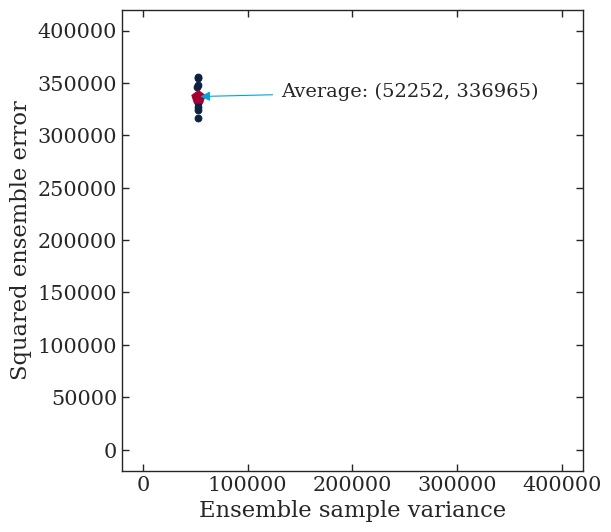

In [10]:
sample = results.sel(ensemble=slice(1, None))
verification = results.sel(ensemble=0)

plot_err_vs_var(sample, verification, "ens")

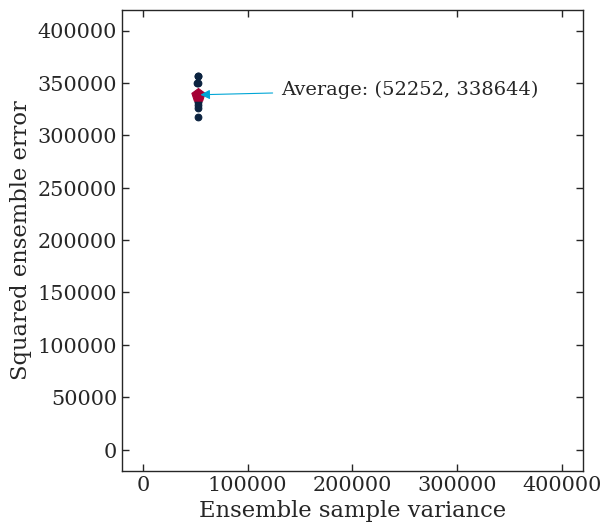

In [11]:
sample = results.sel(ensemble=slice(1, None))
verification = era5_ver

plot_err_vs_var(sample, verification, "era5")